In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
os.getcwd()
path=os.chdir('/content/drive/My Drive/Thesis Model/')

In [4]:
complete_scenarios = ["base", "x15_crews", "x2_crews", "x5_crews", "x10_crews", "infec_2", "infec_3", "infec_5", "infec_6", "infec_7"]
output_dfs = {}

for scenario in complete_scenarios:
  output_dfs['output_df_data'+scenario] = pd.read_excel('sensitivity_raw.xlsx', sheet_name='output_df_data'+scenario)
  output_dfs['output_df_states'+scenario] = pd.read_excel('sensitivity_raw.xlsx', sheet_name='output_df_states'+scenario)
  output_dfs['output_df_sd'+scenario] = pd.read_excel('sensitivity_raw.xlsx', sheet_name='output_df_sd'+scenario)


In [33]:
sd_scenarios = ["sen1", "sen2", "sen3", "sen4", "sen5", "sen6", "sen7", "sen8", "sen9"]
for scenario in sd_scenarios:
  output_dfs['output_df_sd'+scenario] = pd.read_excel('sensitivity_raw.xlsx', sheet_name='output_df_sd'+scenario)

In [ ]:
output_dfs['output_df_maxExtremebase'] = pd.read_excel('sensitivity_raw.xlsx', sheet_name='output_df_maxExtremebase')
output_dfs['output_df_minExtremebase'] = pd.read_excel('sensitivity_raw.xlsx', sheet_name='output_df_minExtremebase')

In [5]:
shapes = ['s', 'o', '^', '>', 'v', '<', 'd', 'p', 'h', '8']
colors = [(0, 0, 0), (1, 0, 0), (0, 0.68, 0), (0, 0, 1), (0.5, 0.5, 0.5), (0.95, 0.4, 0),
          (0.9, 0, 0.9), (0.9, 0.9, 0), (0, 0.9, 0.9), (0.68, 0.68, 0), (1, 0.68, 0.68)]
linestyles = ['solid', (0, (5, 5)), (0, (3, 5, 1, 5)), (0, (3, 1, 1, 1)), (0, (1, 1)),
              (0, (5, 10)), (0, (5, 1)), (0, (3, 5, 1, 5, 1, 5)), (0, (3, 1, 1, 1, 1, 1)),
              (0, (3, 10, 1, 10, 1, 10)), (0, (1, 10)), 'dashdot']

In [6]:
def plot_variable_ex(data, axis, ylable, labels, ylablesize=20, legsize=15, small=True):
  plt.figure()
  ax = plt.gca()
  # plt.rcdefaults()
  plt.rcParams["font.family"] = "STIXGeneral"
  plt.rcParams.update({'font.serif':'Times New Roman'})
  if small:
      # Set general font size
      plt.rcParams['font.size'] = '20'
      plt.rcParams['axes.linewidth'] = 1.1

      # Set tick font size
      for label in (ax.get_xticklabels() + ax.get_yticklabels()):
          label.set_fontsize(20)
  scenarios = ["min", "max"]
  color_counter = 0
  for scenario in scenarios:
    plt.plot(output_dfs['output_df_'+scenario+'Extremebase'].index, output_dfs['output_df_'+scenario+'Extremebase'][data], color=colors[color_counter], linewidth=1.5, label=labels[color_counter])
    color_counter += 1

  plt.gca().axis(axis)
  if small:
    plt.gca().set_xlabel('Days', fontsize=20)
    plt.gca().set_ylabel(ylable, fontsize=ylablesize)
    plt.legend(fontsize=legsize, frameon=False)
  else:
    plt.gca().set_xlabel('Days')
    plt.gca().set_ylabel(ylable)
    plt.legend(frameon=False)

In [7]:
def plot_variable_sen(scenarios, df_type, data, axis, ylable, labels, ylablesize=20, legsize=15, small=True):
  plt.figure()
  ax = plt.gca()
  # plt.rcdefaults()
  plt.rcParams["font.family"] = "STIXGeneral"
  plt.rcParams.update({'font.serif':'Times New Roman'})
  if small:
      # Set general font size
      plt.rcParams['font.size'] = '20'
      plt.rcParams['axes.linewidth'] = 1.1

      # Set tick font size
      for label in (ax.get_xticklabels() + ax.get_yticklabels()):
          label.set_fontsize(20)
  color_counter = 0
  for scenario in scenarios:
    if df_type[-2:] == 'sd':
      plt.plot(output_dfs[df_type+scenario].index, output_dfs[df_type+scenario][data], color=colors[color_counter], linewidth=1.5, label=labels[color_counter])
    else:
      plt.plot(output_dfs[df_type+scenario]['t'], output_dfs[df_type+scenario][data], color=colors[color_counter], linewidth=1.5, label=labels[color_counter])
    color_counter += 1

  plt.gca().axis(axis)
  if small:
    plt.gca().set_xlabel('Days', fontsize=20)
    plt.gca().set_ylabel(ylable, fontsize=ylablesize)
    plt.legend(fontsize=legsize, frameon=False)
  else:
    plt.gca().set_xlabel('Days')
    plt.gca().set_ylabel(ylable)
    plt.legend(frameon=False)

**Initial Infectivity**

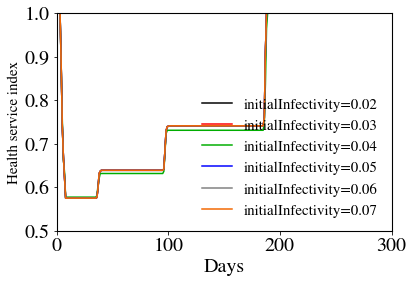

In [9]:
scenarios = ["infec_2", "infec_3", "base", "infec_5", "infec_6", "infec_7"]
labels = ["initialInfectivity=0.02", "initialInfectivity=0.03", "initialInfectivity=0.04", "initialInfectivity=0.05", "initialInfectivity=0.06", "initialInfectivity=0.07"]
plot_variable_sen(scenarios, 'output_df_sd', 'statOfHealth', [0, 300, 0.5, 1], 'Health service index', labels, ylablesize=15, legsize=15)

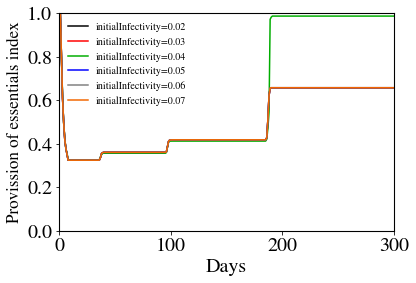

In [10]:
plot_variable_sen(scenarios, 'output_df_sd', 'statOfFood', [0, 300, 0, 1], 'Provission of essentials index', labels, ylablesize=17, legsize=10)

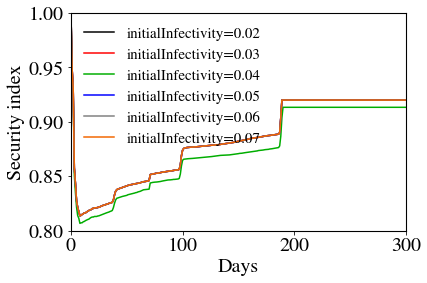

In [13]:
plot_variable_sen(scenarios, 'output_df_sd', "securityIndex", [0, 300, 0.8, 1], 'Security index', labels, ylablesize=20)

**Restoration Rate**

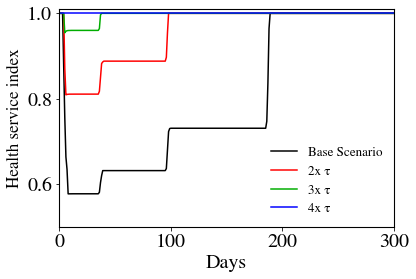

In [29]:
scenarios=["base", "x15_crews", "x2_crews", "x5_crews"]
labels = ["Base Scenario", "2x \u03C4", "3x \u03C4", "4x \u03C4"]
plot_variable_sen(scenarios, 'output_df_sd', 'statOfHealth', [0, 300, 0.5, 1.01], 'Health service index', labels, ylablesize=17, legsize=13)

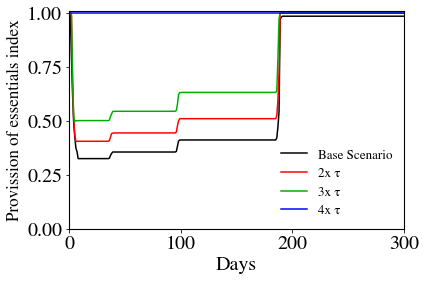

In [26]:
plot_variable_sen(scenarios, 'output_df_sd', 'statOfFood', [0, 300, 0, 1.01], 'Provission of essentials index', labels, ylablesize=17, legsize=13)

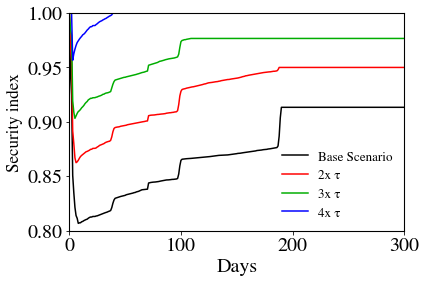

In [30]:
plot_variable_sen(scenarios, 'output_df_sd', "securityIndex", [0, 300, 0.8, 1], 'Security index', labels, ylablesize=17, legsize=13)

Previously Analyzed

KeyError: ignored

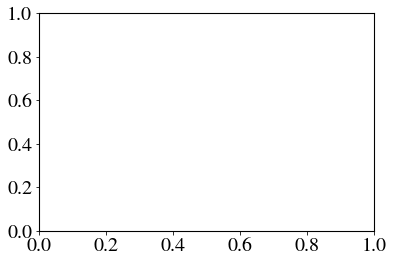

In [31]:
labels = ["security crews = 0", "security crews = 10000"]
plot_variable_ex("crimes", [0, 300, 0, 200], 'Crimes\n(per thousands of population)', labels, ylablesize=17)

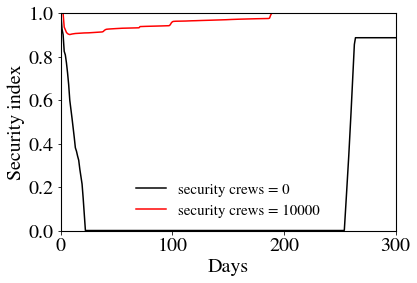

In [ ]:
labels = ["security crews = 0", "security crews = 10000"]
plot_variable_ex("securityIndex", [0, 300, 0, 1], 'Security index', labels, ylablesize=20)

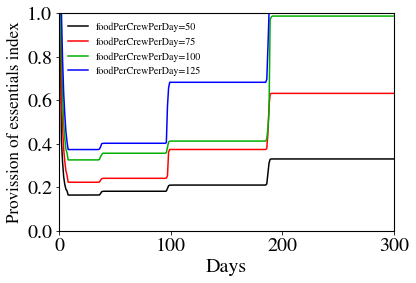

In [34]:
scenarios = ["sen1", "sen3", "base", "sen2"]
labels = ["foodPerCrewPerDay=50", "foodPerCrewPerDay=75", "foodPerCrewPerDay=100", "foodPerCrewPerDay=125"]
plot_variable_sen(scenarios, 'output_df_sd', 'statOfFood', [0, 300, 0, 1], 'Provission of essentials index', labels, ylablesize=17, legsize=10)

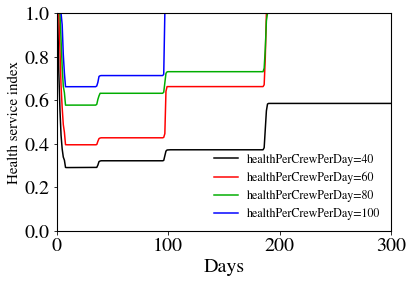

In [35]:
scenarios = ["sen1", "sen3", "base", "sen2"]
labels = ["healthPerCrewPerDay=40", "healthPerCrewPerDay=60", "healthPerCrewPerDay=80", "healthPerCrewPerDay=100"]
plot_variable_sen(scenarios, 'output_df_sd', 'statOfHealth', [0, 300, 0, 1], 'Health service index', labels, ylablesize=15, legsize=12)

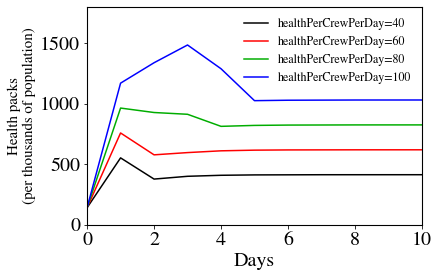

In [36]:
scenarios = ["sen1", "sen3", "base", "sen2"]
labels = ["healthPerCrewPerDay=40", "healthPerCrewPerDay=60", "healthPerCrewPerDay=80", "healthPerCrewPerDay=100"]
plot_variable_sen(scenarios, 'output_df_sd', 'healthResources', [0, 10, 0, 1800], 'Health packs\n(per thousands of population)', labels, ylablesize=15, legsize=12)

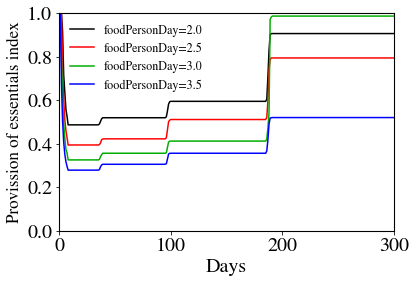

In [ ]:
scenarios = ["sen4", "sen5", "base", "sen6"]
labels = ["foodPersonDay=2.0", "foodPersonDay=2.5", "foodPersonDay=3.0", "foodPersonDay=3.5"]
plot_variable_sen(scenarios, 'output_df_sd', 'statOfFood', [0, 300, 0, 1], 'Provission of essentials index', labels, ylablesize=17, legsize=12)

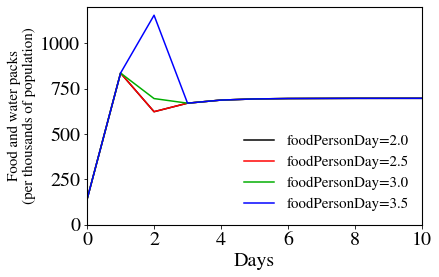

In [ ]:
scenarios = ["sen6", "base", "sen4", "sen5"]
labels = ["foodPersonDay=2.0", "foodPersonDay=2.5", "foodPersonDay=3.0", "foodPersonDay=3.5"]
plot_variable_sen(scenarios, 'output_df_sd', 'foodAndWater', [0, 10, 0, 1200], 'Food and water packs\n(per thousands of population)', labels, ylablesize=15, legsize=15)

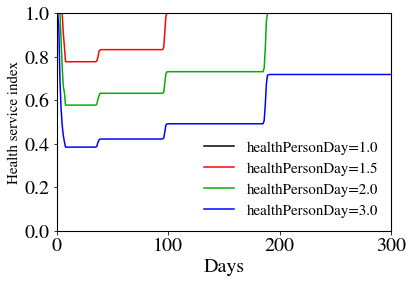

In [ ]:
scenarios = ["sen4", "sen5", "base", "sen6"]
labels = ["healthPersonDay=1.0", "healthPersonDay=1.5", "healthPersonDay=2.0", "healthPersonDay=3.0"]
plot_variable_sen(scenarios, 'output_df_sd', 'statOfHealth', [0, 300, 0, 1], 'Health service index', labels, ylablesize=15, legsize=15)

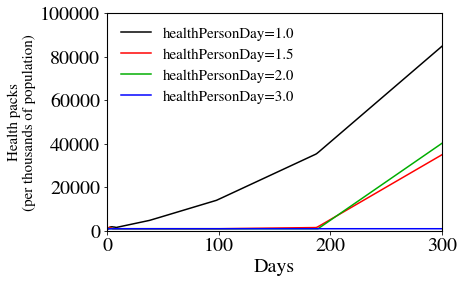

In [ ]:
scenarios = ["sen4", "sen5", "base", "sen6"]
labels = ["healthPersonDay=1.0", "healthPersonDay=1.5", "healthPersonDay=2.0", "healthPersonDay=3.0"]
plot_variable_sen(scenarios, 'output_df_sd', 'healthResources', [0, 300, 0, 100000], 'Health packs\n(per thousands of population)', labels, ylablesize=15, legsize=15)

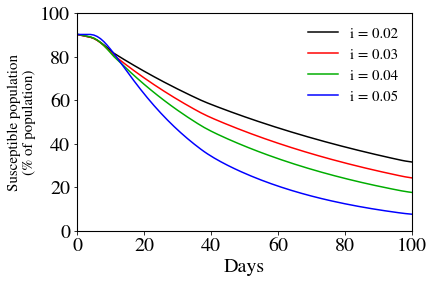

In [39]:
scenarios = ["sen7", "sen8", "base", "sen9"]
labels = ["i = 0.02", "i = 0.03", "i = 0.04", "i = 0.05"]
plot_variable_sen(scenarios, 'output_df_sd', 'popSuscToDeadlyDisease', [0, 100, 0, 100], 'Susceptible population\n(% of population)', labels, ylablesize=15, legsize=15)

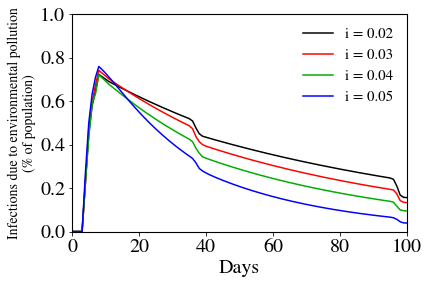

In [40]:
plot_variable_sen(scenarios, 'output_df_sd', 'envInfectionRate', [0, 100, 0, 1], 'Infections due to environmental pollution\n(% of population)', labels, ylablesize=14, legsize=15)

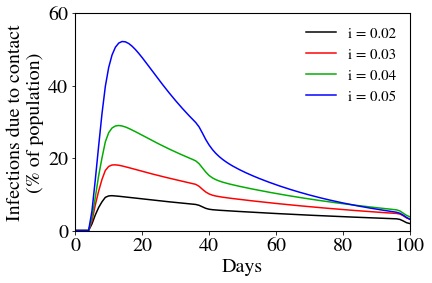

In [41]:
plot_variable_sen(scenarios, 'output_df_sd', 'infectionRate', [0, 100, 0, 60], 'Infections due to contact\n(% of population)', labels, ylablesize=20, legsize=15)

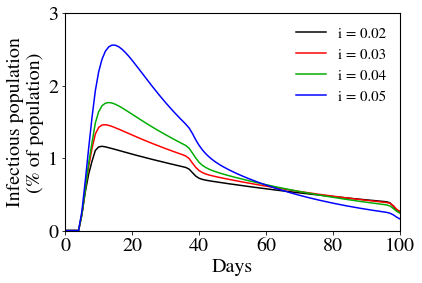

In [42]:
plot_variable_sen(scenarios, 'output_df_sd', 'popInfected', [0, 100, 0, 3], 'Infectious population\n(% of population)', labels, ylablesize=20, legsize=15)

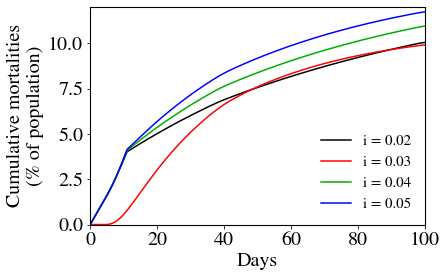

In [44]:
scenarios = ["sen7", "sen9", "sen8", "base"]
plot_variable_sen(scenarios, 'output_df_sd', 'dead', [0, 100, 0, 12], 'Cumulative mortalities\n(% of population)', labels, ylablesize=20, legsize=15)

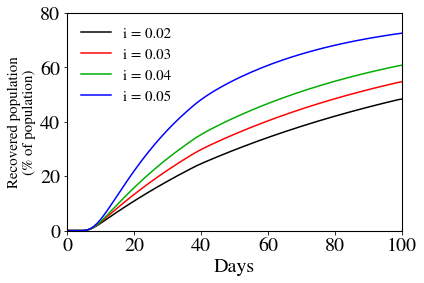

In [45]:
scenarios = ["sen7", "sen8", "base", "sen9"]
plot_variable_sen(scenarios, 'output_df_sd', 'recovered', [0, 100, 0, 80], 'Recovered population\n(% of population)', labels, ylablesize=15, legsize=15)

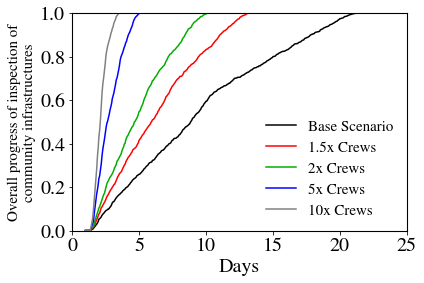

In [ ]:
scenarios=["base", "x15_crews", "x2_crews", "x5_crews", "x10_crews"]
labels = ["Base Scenario", "1.5x Crews", "2x Crews", "5x Crews", "10x Crews"]
plot_variable_sen(scenarios, 'output_df_data', 'DataCollector_DataCollecting_total_assessed_lifelines_total', [0, 25, 0, 1], 'Overall progress of inspection of\ncommunity infrastructures', labels, ylablesize=15, legsize=15)

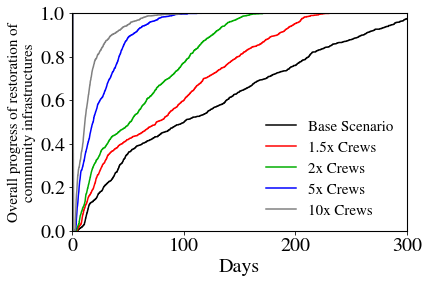

In [ ]:
scenarios=["base", "x15_crews", "x2_crews", "x5_crews", "x10_crews"]
labels = ["Base Scenario", "1.5x Crews", "2x Crews", "5x Crews", "10x Crews"]
plot_variable_sen(scenarios, 'output_df_data', 'DataCollector_DataCollecting_total_restored_lifelines_total', [0, 300, 0, 1], 'Overall progress of restoration of\ncommunity infrastructures', labels, ylablesize=15, legsize=15)